- 어떤 규칙을 하나의 트리(tree) 형태로 표현한 후 이를 바탕으로 분류나 회귀 문제를 해결하는 알고리즘
- 딥러닝 기반을 제외한 전통적인 통계 기반의 머신러닝 모델중 직관적이고 가장 실용성이 높은 모델중 하나
- scikit-learn의 tree 서브모듈에 DecisionTreeClassifier()

# 로지스틱 회귀로 와인 분류하기 - 화이트 와인

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- https://raw.githubusercontent.com/rickeipark/hg-mldl/master/wine.csv

In [4]:
wine = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/wine.csv')

In [6]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [7]:
wine.shape

(6497, 4)

In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [11]:
wine['class']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6492    1.0
6493    1.0
6494    1.0
6495    1.0
6496    1.0
Name: class, Length: 6497, dtype: float64

In [12]:
wine.describe

<bound method NDFrame.describe of       alcohol  sugar    pH  class
0         9.4    1.9  3.51    0.0
1         9.8    2.6  3.20    0.0
2         9.8    2.3  3.26    0.0
3         9.8    1.9  3.16    0.0
4         9.4    1.9  3.51    0.0
...       ...    ...   ...    ...
6492     11.2    1.6  3.27    1.0
6493      9.6    8.0  3.15    1.0
6494      9.4    1.2  2.99    1.0
6495     12.8    1.1  3.34    1.0
6496     11.8    0.8  3.26    1.0

[6497 rows x 4 columns]>

In [13]:
wine['class'].unique()

array([0., 1.])

In [14]:
wine['class'].value_counts()

1.0    4898
0.0    1599
Name: class, dtype: int64

In [15]:
wine_input = wine[['alcohol', 'sugar', 'pH']].to_numpy()
wine_target = wine['class'].to_numpy()

In [16]:
wine_input.shape, wine_target.shape

((6497, 3), (6497,))

# 훈련 셋과 테스트 셋으로 분리

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine_input, wine_target, test_size = 0.2,
                                                    random_state=42)


## 피처 스케일링

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

## 로지스틱 회귀 모델 구축하기

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, y_train)
print(lr.score(train_scaled, y_train))
print(lr.score(test_scaled, y_test))

0.7808350971714451
0.7776923076923077


In [30]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


In [34]:
lr.predict_proba(train_scaled)

array([[0.06189333, 0.93810667],
       [0.21742616, 0.78257384],
       [0.40703571, 0.59296429],
       ...,
       [0.20751956, 0.79248044],
       [0.08048173, 0.91951827],
       [0.69744416, 0.30255584]])

In [35]:
lr.predict(test_scaled[:5])

array([1., 1., 1., 1., 1.])

## 의사결정나무

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_scaled, y_train)
print(dt.score(train_scaled, y_train))
print(dt.score(test_scaled, y_test))

0.996921300750433
0.86


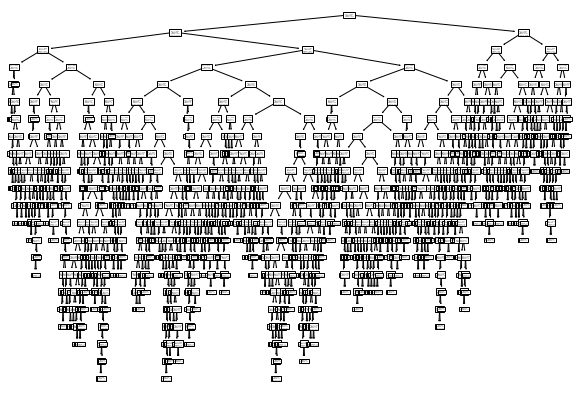

In [40]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

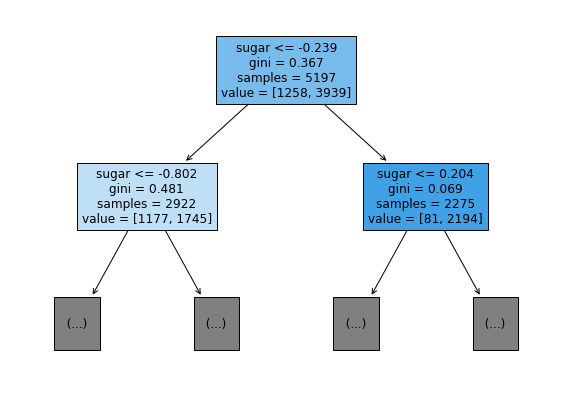

In [42]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

## 가지치기(pruning)
- 최대 트리로 형성된 결정트리의 특정 노드 밑의 트리를 제거하여 일반화 성능을 높이는 것
- 과적합을 막기위해 사용된다.
- 더 많은 가지가 생기지 않도록 최대 깊이, leaf 노드의 최대 개수, 

In [43]:
dt = DecisionTreeClassifier(max_depth = 3, random_state=42)
dt.fit(train_scaled, y_train)
print(dt.score(train_scaled, y_train))
print(dt.score(test_scaled, y_test))

0.8454877814123533
0.8415384615384616


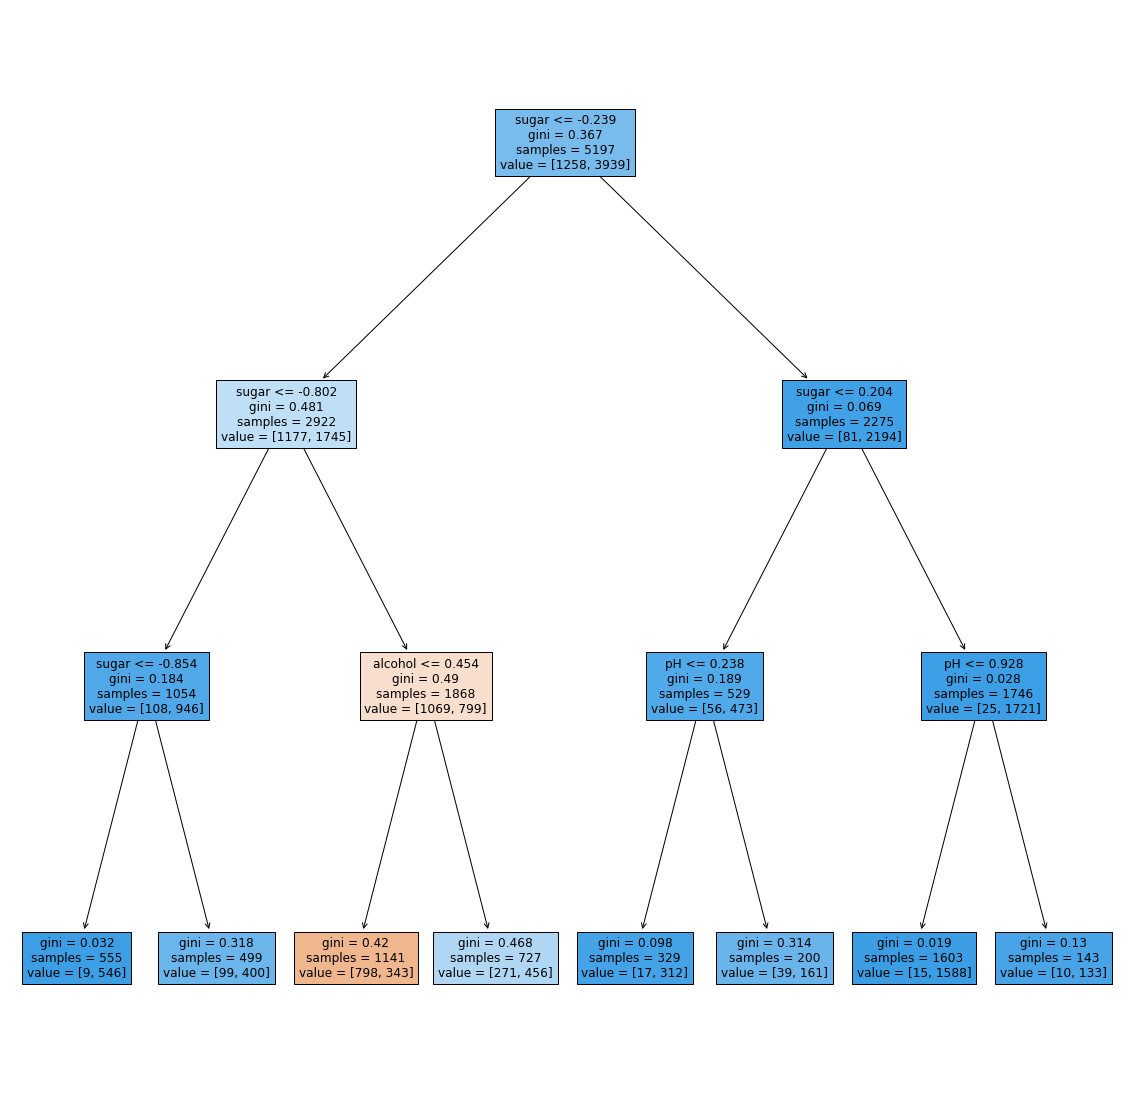

In [46]:
plt.figure(figsize=(20, 20))
plot_tree(dt, filled=True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

In [48]:
dt = DecisionTreeClassifier(max_depth = 3, random_state=42)
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.8454877814123533
0.8415384615384616


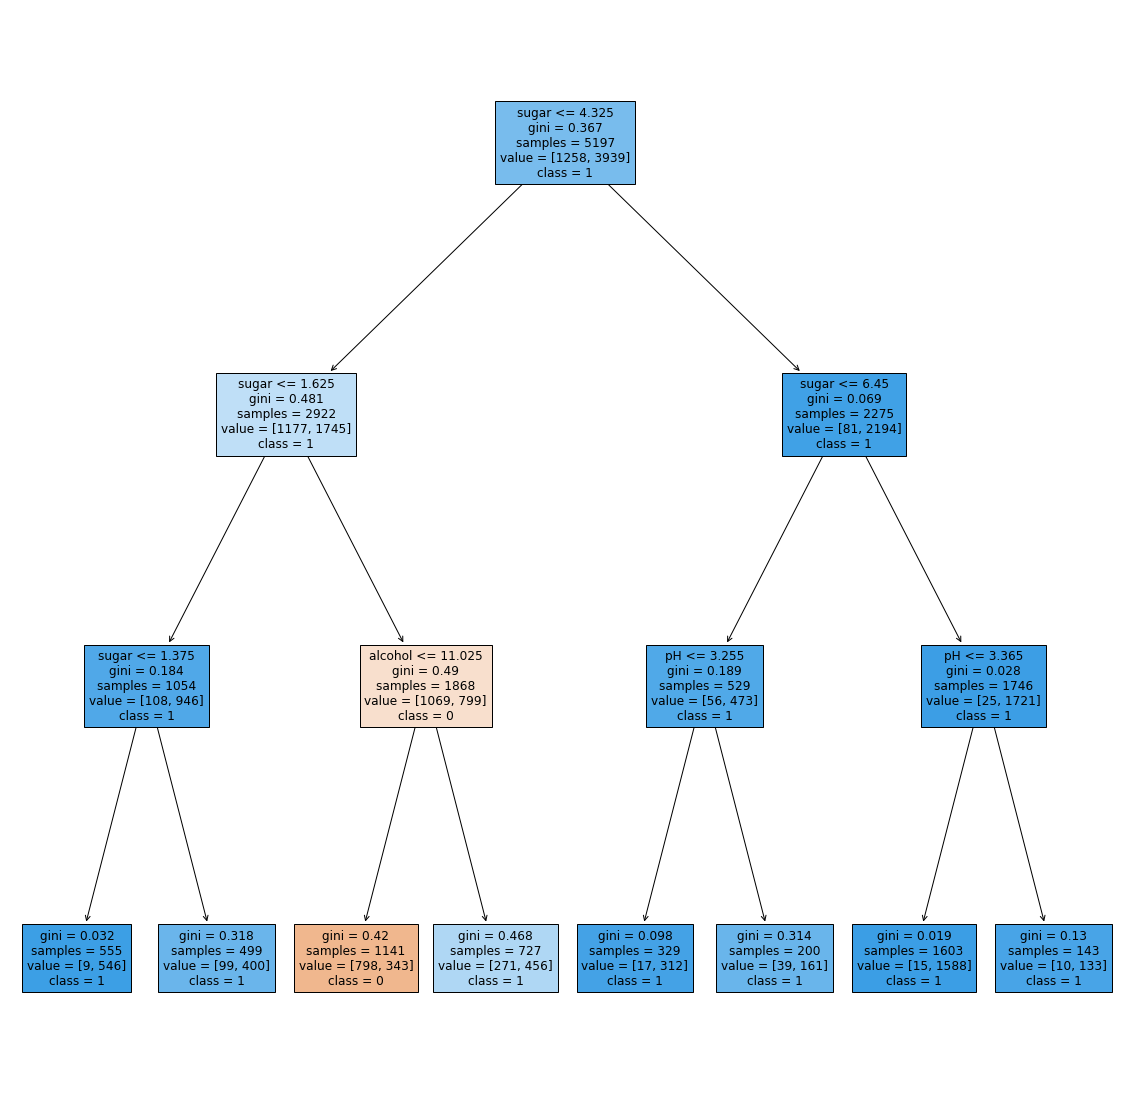

In [53]:
plt.figure(figsize=(20, 20))
plot_tree(dt, filled=True, feature_names = ['alcohol', 'sugar', 'pH'], class_names=['0','1'])
plt.show()

In [51]:
# 특성 중요도 : 결정트리는 어떤 특성이 가장 유용한지를 나타내는 특성 중요도를 계산해 준다.
dt.feature_importances_

array([0.12345626, 0.86862934, 0.0079144 ])